case_id                    0
state                      0
isMetro                    0
areaname                   0
county                     0
family_member_count        0
housing_cost               0
food_cost                  0
transportation_cost        0
healthcare_cost            0
other_necessities_cost     0
childcare_cost             0
taxes                      0
total_cost                 0
median_family_income      10
dtype: int64


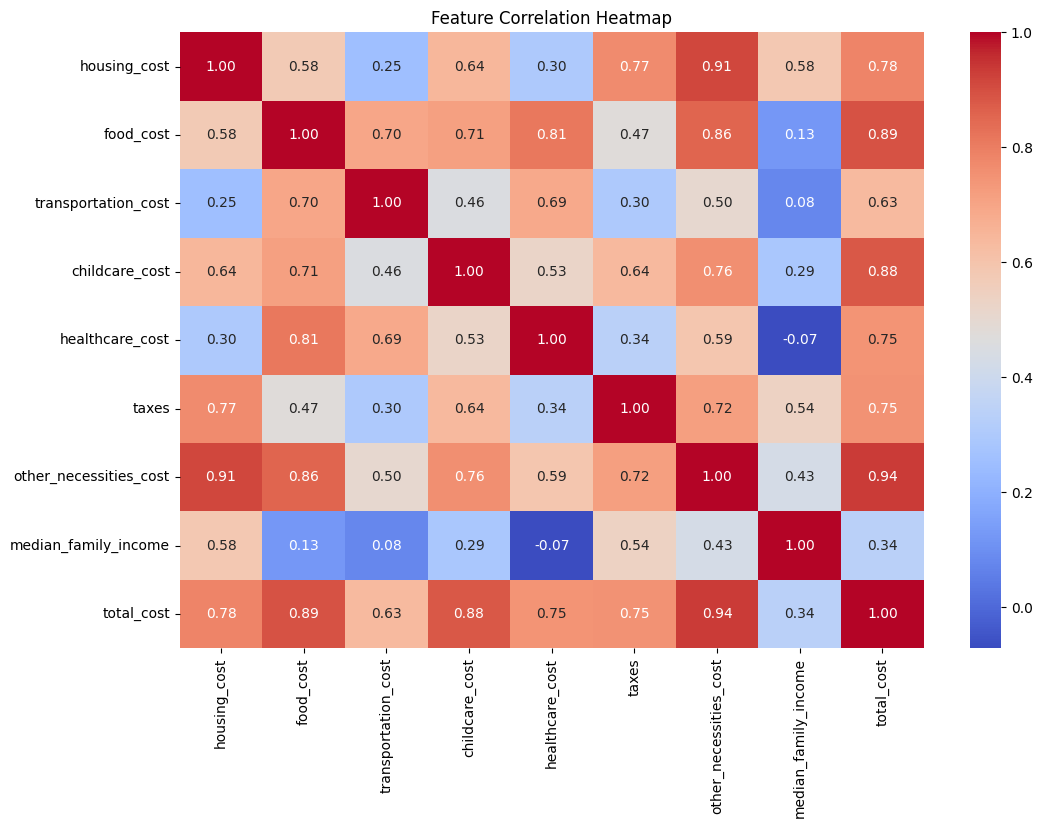

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv("cost_of_living_us.csv")

# Define the target variable and features
features = [
    'housing_cost', 'food_cost', 'transportation_cost', 'childcare_cost',
    'healthcare_cost', 'taxes', 'other_necessities_cost', 'median_family_income'
]
target = 'total_cost'

# Check for missing values
print(data.isnull().sum())

# Plot a heatmap of correlations
plt.figure(figsize=(12, 8))
correlation_matrix = data[features + [target]].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


Linear Regression: MSE = 0.00, R2 Score = 1.00
Random Forest: MSE = 971309.96, R2 Score = 1.00
Gradient Boosting: MSE = 1969035.96, R2 Score = 1.00
               Model           MSE  R2 Score
0  Linear Regression  4.022429e-06  1.000000
1      Random Forest  9.713100e+05  0.997963
2  Gradient Boosting  1.969036e+06  0.995870


<ipython-input-6-570cbbfabb9f>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")


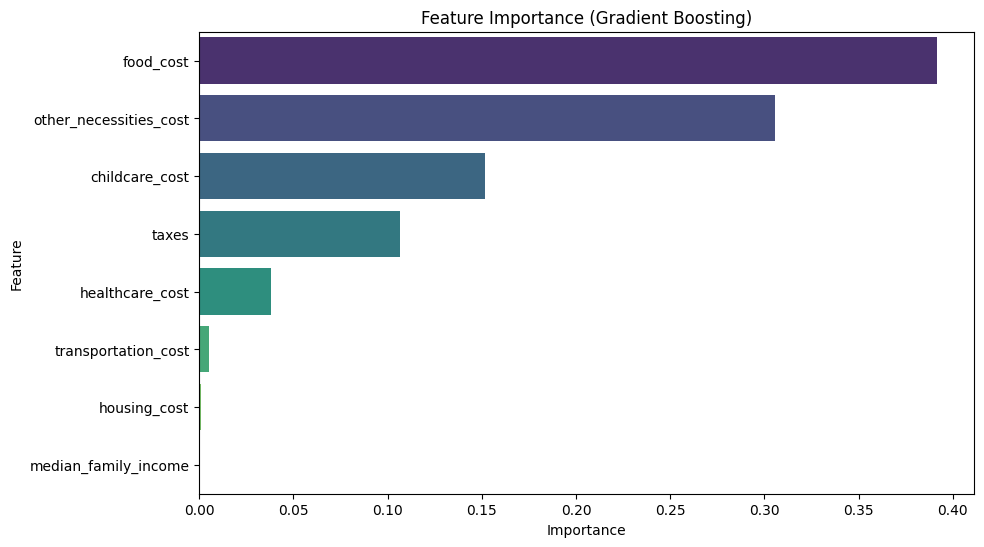

In [6]:
# Preprocess data: Handle missing values and scale features
X = data[features]
y = data[target]

# Handle missing values (if any)
X = X.fillna(X.median())

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

# Evaluate models
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({"Model": name, "MSE": mse, "R2 Score": r2})
    print(f"{name}: MSE = {mse:.2f}, R2 Score = {r2:.2f}")

# Convert results to a DataFrame for easy comparison
results_df = pd.DataFrame(results)

# Display results
print(results_df)

# Plot feature importance for the best model (e.g., Gradient Boosting)
best_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
best_model.fit(X_train, y_train)

# Get feature importance
importance = best_model.feature_importances_
importance_df = pd.DataFrame({"Feature": features, "Importance": importance}).sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")
plt.title("Feature Importance (Gradient Boosting)")
plt.show()


Linear Regression: MSE = 0.00, R² = 1.00
Ridge Regression: MSE = 0.17, R² = 1.00
Decision Tree: MSE = 23802981.50, R² = 0.95
Random Forest: MSE = 971309.96, R² = 1.00
Gradient Boosting: MSE = 1969035.96, R² = 1.00

Model Comparison:
               Model           MSE  R2 Score
0  Linear Regression  4.022429e-06  1.000000
1   Ridge Regression  1.688871e-01  1.000000
3      Random Forest  9.713100e+05  0.997963
4  Gradient Boosting  1.969036e+06  0.995870
2      Decision Tree  2.380298e+07  0.950078


<ipython-input-4-04187bf22f21>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="R2 Score", y="Model", data=results_df_sorted, palette="viridis")


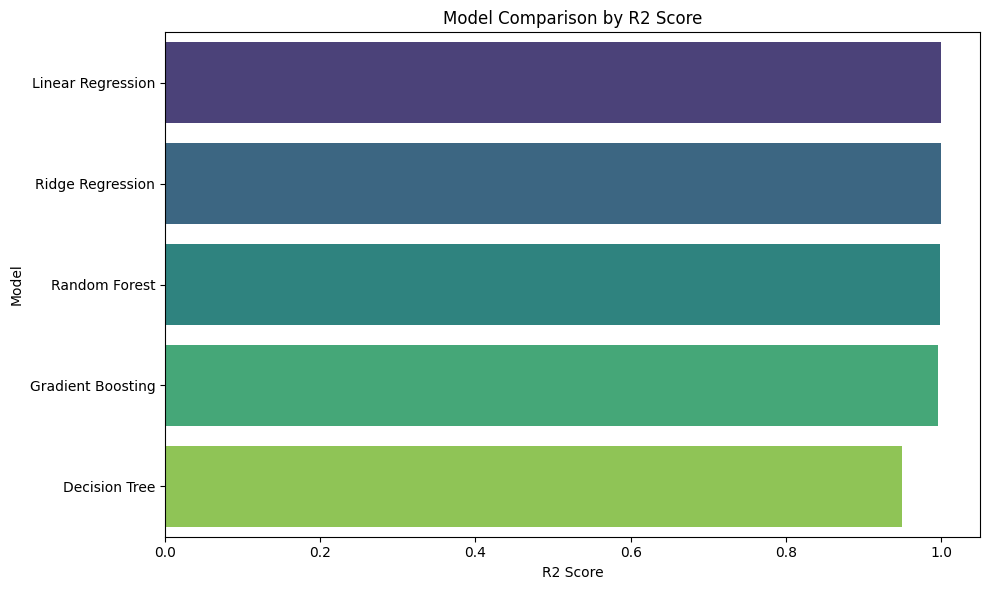

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv("cost_of_living_us.csv")

# Define features and target
features = ['housing_cost', 'food_cost', 'transportation_cost',
            'childcare_cost', 'healthcare_cost', 'taxes',
            'other_necessities_cost', 'median_family_income']
target = 'total_cost'

# Preprocess the dataset
X = data[features].fillna(data[features].median())  # Handle missing values
y = data[target]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Decision Tree": DecisionTreeRegressor(max_depth=5, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

# Evaluate models
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({"Model": name, "MSE": mse, "R2 Score": r2})
    print(f"{name}: MSE = {mse:.2f}, R² = {r2:.2f}")

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Sort results by R² Score
results_df_sorted = results_df.sort_values(by="R2 Score", ascending=False)

# Display results
print("\nModel Comparison:")
print(results_df_sorted)

# Plot comparison
plt.figure(figsize=(10, 6))
sns.barplot(x="R2 Score", y="Model", data=results_df_sorted, palette="viridis")
plt.title("Model Comparison by R2 Score")
plt.xlabel("R2 Score")
plt.ylabel("Model")
plt.tight_layout()
plt.show()


Linear Regression: MSE = 0.00, R² = 1.00
Ridge Regression: MSE = 0.17, R² = 1.00
Decision Tree: MSE = 23802981.50, R² = 0.95
Random Forest: MSE = 971309.96, R² = 1.00
Gradient Boosting (Standard): MSE = 1969035.96, R² = 1.00
Gradient Boosting (Noisy): MSE = 2089989.33, R² = 1.00
Gradient Boosting (Polynomial): MSE = 2190497.68, R² = 1.00

Model Comparison:
                            Model           MSE  R² Score
0               Linear Regression  4.022429e-06  1.000000
1                Ridge Regression  1.688871e-01  1.000000
3                   Random Forest  9.713100e+05  0.997963
4    Gradient Boosting (Standard)  1.969036e+06  0.995870
5       Gradient Boosting (Noisy)  2.089989e+06  0.995617
6  Gradient Boosting (Polynomial)  2.190498e+06  0.995406
2                   Decision Tree  2.380298e+07  0.950078


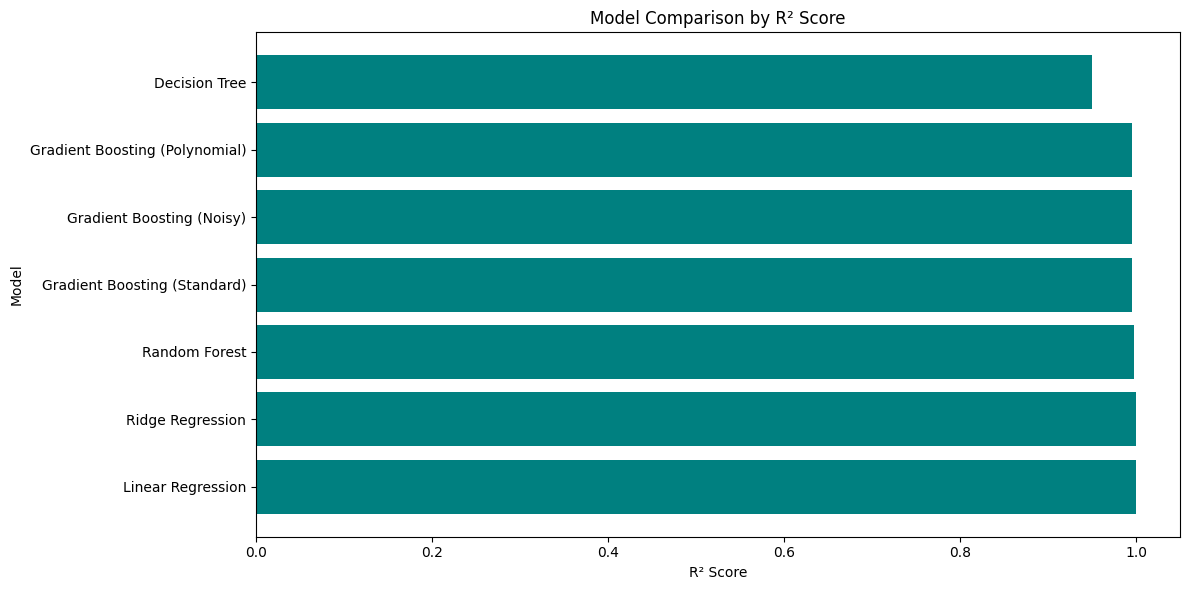

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("cost_of_living_us.csv")

# Define features and target
features = ['housing_cost', 'food_cost', 'transportation_cost',
            'childcare_cost', 'healthcare_cost', 'taxes',
            'other_necessities_cost', 'median_family_income']
target = 'total_cost'

# Preprocess the dataset
X = data[features].fillna(data[features].median())  # Handle missing values
y = data[target]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Add Polynomial Features (to simulate non-linear relationships)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Simulate noisy data (to test robustness)
X_train_noisy, y_train_noisy = shuffle(X_train, y_train + np.random.normal(0, y.std() * 0.1, size=y_train.shape), random_state=42)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Decision Tree": DecisionTreeRegressor(max_depth=5, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting (Standard)": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    "Gradient Boosting (Noisy)": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    "Gradient Boosting (Polynomial)": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
}

# Evaluate models
results = []
for name, model in models.items():
    if "Noisy" in name:
        model.fit(X_train_noisy, y_train_noisy)
        y_pred = model.predict(X_test)
    elif "Polynomial" in name:
        model.fit(X_train_poly, y_train)
        y_pred = model.predict(X_test_poly)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({"Model": name, "MSE": mse, "R² Score": r2})
    print(f"{name}: MSE = {mse:.2f}, R² = {r2:.2f}")

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Sort results by R² Score
results_df_sorted = results_df.sort_values(by="R² Score", ascending=False)

# Display results
print("\nModel Comparison:")
print(results_df_sorted)

# Plot comparison
plt.figure(figsize=(12, 6))
plt.barh(results_df_sorted["Model"], results_df_sorted["R² Score"], color='teal')
plt.title("Model Comparison by R² Score")
plt.xlabel("R² Score")
plt.ylabel("Model")
plt.tight_layout()
plt.show()

